# Introdução à Ciência de Dados - UFPB
Professor: Yuri Malheiros

## Regressão Linear - Exercício

Utilizando o dataset dos filmes, aplique a regressão linear para predizer o `US Gross` de acordo com o `Production Budget`.

Primeiro carregue os dados:

In [22]:
import pandas as pd

In [35]:
path = "datasets/movies.csv"

df = pd.read_csv(path)
# df = df.dropna()
df

,Title,US Gross,Worldwide Gross,US DVD Sales,Production Budget,Release Date,MPAA Rating,Running Time (min),Distributor,Source,Major Genre,Creative Type,Director,Rotten Tomatoes Rating,IMDB Rating,IMDB Votes
0,The Land Girls,146083.0,146083.0,NaN,8000000.0,12-Jun-98,R,NaN,Gramercy,NaN,NaN,NaN,NaN,NaN,6.1,1071.0
1,"First Love, Last Rites",10876.0,10876.0,NaN,300000.0,7-Aug-98,R,NaN,Strand,NaN,Drama,NaN,NaN,NaN,6.9,207.0
2,I Married a Strange Person,203134.0,203134.0,NaN,250000.0,28-Aug-98,NaN,NaN,Lionsgate,NaN,Comedy,NaN,NaN,NaN,6.8,865.0
3,Let's Talk About Sex,373615.0,373615.0,NaN,300000.0,11-Sep-98,NaN,NaN,Fine Line,NaN,Comedy,NaN,NaN,13.0,NaN,NaN
4,Slam,1009819.0,1087521.0,NaN,1000000.0,9-Oct-98,R,NaN,Trimark,Original Screenplay,Drama,Contemporary Fiction,NaN,62.0,3.4,165.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,Zack and Miri Make a Porno,31452765.0,36851125.0,21240321.0,24000000.0,31-Oct-08,R,101.0,Weinstein Co.,Original Screenplay,Comedy,Contemporary Fiction,Kevin Smith,65.0,7.0,55687.0
3197,Zodiac,33080084.0,83080084.0,20983030.0,85000000.0,2-Mar-07,R,157.0,Paramount Pictures,Based on Book/Short Story,Thriller/Suspense,Dramatization,David Fincher,89.0,NaN,NaN
3198,Zoom,11989328.0,12506188.0,6679409.0,35000000.0,11-Aug-06,PG,NaN,Sony Pictures,Based on Comic/Graphic Novel,Adventure,Super Hero,Peter Hewitt,3.0,3.4,7424.0
3199,The Legend of Zorro,45575336.0,141475336.0,NaN,80000000.0,28-Oct-05,PG,129.0,Sony Pictures,Remake,Adventure,Historical Fiction,Martin Campbell,26.0,5.7,21161.0


Visualize os dados com um gráfico de dispersão:

In [37]:
df = df.dropna(subset=['US Gross','Production Budget'])

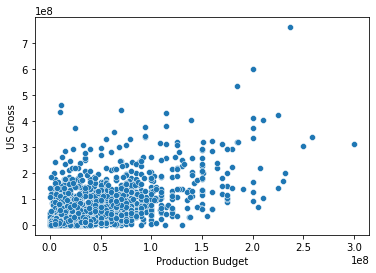

In [38]:
# Código para visualizar os dados aqui
import seaborn as sns

sns.scatterplot(data=df, x=df['Production Budget'], y=df['US Gross'])

Use a regressão linear para encontrar os coeficientes a e b:

In [39]:
from scipy.stats import linregress

result = linregress(df["Production Budget"], df["US Gross"])
a = result.slope
b = result.intercept
# mse = result.stderr

Utilize a função `show_regression` abaixo para visualizar o resultado da regressão linear. Nesta função, você deve passar as coordenadas x dos pontos, as coordenadas y, o coeficiente a e o coeficiente b.

In [40]:
#### NÃO ALTERAR ESSE CÓDIGO ####

import matplotlib.pyplot as plt

def gen_line(x_min, x_max, n_points, a, b):
    interval = x_max-x_min
    interval_value = interval/n_points
    
    x_result = []
    y_result = []

    for i in range(n_points):
        current_x = x_min+i*interval_value
        x_result.append(current_x)
        y_result.append(a*current_x + b)
        
    return x_result, y_result

def show_regression(x, y, a, b):
    N = 100

    plt.scatter(x, y)

    line_1 = gen_line(min(x), max(x), N, a, b)
    plt.plot(line_1[0], line_1[1], c= "red")

    plt.gca()
    plt.show()

Exemplo de uso da função:

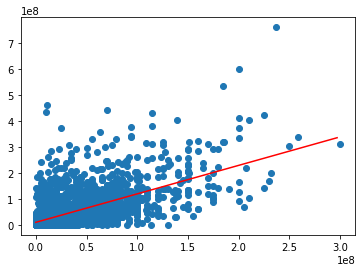

In [41]:
show_regression(df["Production Budget"], df["US Gross"], a, b)

A função `predict` recebe um production budget de um filme e retorna a predição do US Gross para ele:

In [42]:
def predict(production_budget):
    """
    >>> f'{predict(100000):.2f}'
    '10006058.40'
    
    >>> f'{predict(1000000):.2f}'
    10992208.78'

    >>> f'{predict(5000000):.2f}'
    '15375099.36'
    """
    fx = (a * production_budget) + b
    # teste = "%.2f" % fx
    # print(teste)
    return fx

In [43]:
print(f'{predict(100000):.2f}')
print(f'{predict(1000000):.2f}')
print(f'{predict(5000000):.2f}')

10006058.40
10992208.78
15375099.37


## Teste

In [45]:
import doctest

doctest.testmod(verbose=True)

Trying:
    f'{predict(100000):.2f}'
Expecting:
    '10006058.40'
ok
Trying:
    f'{predict(1000000):.2f}'
Expecting:
    10992208.78'
**********************************************************************
File "__main__", line 6, in __main__.predict
Failed example:
    f'{predict(1000000):.2f}'
Expected:
    10992208.78'
Got:
    '10992208.78'
Trying:
    f'{predict(5000000):.2f}'
Expecting:
    '15375099.36'
**********************************************************************
File "__main__", line 9, in __main__.predict
Failed example:
    f'{predict(5000000):.2f}'
Expected:
    '15375099.36'
Got:
    '15375099.37'
3 items had no tests:
    __main__
    __main__.gen_line
    __main__.show_regression
**********************************************************************
1 items had failures:
   2 of   3 in __main__.predict
3 tests in 4 items.
1 passed and 2 failed.
***Test Failed*** 2 failures.


TestResults(failed=2, attempted=3)